In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression
import xgboost

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport


In [9]:
url='https://github.com/yuenwong2sps/Data620/raw/master/assignment_spam_classifier/spambase_test/spambase.data'
raw=pd.read_csv(url)

In [10]:
raw.shape

(4600, 58)

In [11]:
raw.shape[0]

4600

need to add column headers?

In [12]:
url2='https://raw.githubusercontent.com/yuenwong2sps/Data620/master/assignment_spam_classifier/columnHeaders.csv'
raw_header=pd.read_csv(url2)

In [15]:
raw_header.columns
raw.columns = raw_header.columns

In [16]:
#Check if there are null value in the data set
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
_make                         4600 non-null float64
_address                      4600 non-null float64
_all                          4600 non-null float64
_3d                           4600 non-null float64
_our                          4600 non-null float64
_over                         4600 non-null float64
_remove                       4600 non-null float64
_internet                     4600 non-null float64
_order                        4600 non-null float64
_mail                         4600 non-null float64
_receive                      4600 non-null float64
_will                         4600 non-null float64
_people                       4600 non-null float64
_report                       4600 non-null float64
_addresses                    4600 non-null float64
_free                         4600 non-null float64
_business                     4600 non-null float64
_email   

In [17]:
print (raw.is_spam.sum())

1812


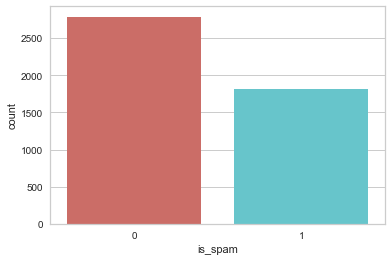

In [18]:
sb.countplot(x='is_spam',data=raw, palette = 'hls')

In [29]:
raw.head(20)

,_make,_address,_all,_3d,_our,_over,_remove,_internet,_order,_mail,...,_;,_(,_[,_!,_$,_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
5,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
6,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
7,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
8,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1
9,0.00,0.00,0.00,0.0,0.00,0.00,0.96,0.00,0.00,1.92,...,0.000,0.000,0.0,0.462,0.000,0.000,1.312,6,21,1


#find the most correlation columns
raw.corr()['is_spam'].abs().sort_values(ascending=False)

The Spearman’s Rank Correlation Coefficient is the non-parametric statistical measure used to study the strength of association between the two ranked variables. This method is applied to the ordinal set of numbers, which can be arranged in order, i.e. one after the other so that ranks can be given to each.

In [20]:
spearmanr_coefficient, p_value=spearmanr(raw._your,raw.is_spam)
print ('Spearmanr Rank Correlation Cofeficient  %0.3f' % (spearmanr_coefficient)  % p_value)
print(p_value)

Spearmanr Rank Correlation Cofeficient  0.502
1.2845476693169102e-291


In [21]:
def SRCC (df):
    print ('Spearmanr Rank Correlation Cofeficient  : ')
    for column_name, column_series in raw.iloc[:, :-1].iteritems():
        spearmanr_coefficient, p_value=spearmanr(column_series,df.is_spam)
        print(column_name + ": " + str(round(spearmanr_coefficient,5)) +" ; " + " p_value: " +str(round(p_value,5)))

SRCC(raw)

Spearmanr Rank Correlation Cofeficient  : 
_make: 0.24089 ;  p_value: 0.0
_address: 0.29714 ;  p_value: 0.0
_all: 0.33261 ;  p_value: 0.0
_3d: 0.09082 ;  p_value: 0.0
_our: 0.409 ;  p_value: 0.0
_over: 0.31885 ;  p_value: 0.0
_remove: 0.519 ;  p_value: 0.0
_internet: 0.34399 ;  p_value: 0.0
_order: 0.30091 ;  p_value: 0.0
_mail: 0.29705 ;  p_value: 0.0
_receive: 0.35515 ;  p_value: 0.0
_will: 0.14833 ;  p_value: 0.0
_people: 0.21304 ;  p_value: 0.0
_report: 0.14988 ;  p_value: 0.0
_addresses: 0.26528 ;  p_value: 0.0
_free: 0.50399 ;  p_value: 0.0
_business: 0.35311 ;  p_value: 0.0
_email: 0.29872 ;  p_value: 0.0
_you: 0.36106 ;  p_value: 0.0
_credit: 0.32433 ;  p_value: 0.0
_your: 0.50152 ;  p_value: 0.0
_font: 0.13804 ;  p_value: 0.0
_000: 0.42599 ;  p_value: 0.0
_money: 0.47236 ;  p_value: 0.0
_hp: -0.39975 ;  p_value: 0.0
_hpl: -0.34182 ;  p_value: 0.0
_george: -0.35388 ;  p_value: 0.0
_650: -0.22614 ;  p_value: 0.0
_lab: -0.22065 ;  p_value: 0.0
_labs: -0.24576 ;  p_value: 0.0
_tel

In [22]:
#def SRCC_log (df):
#    print ('Spearmanr Rank Correlation Cofeficient for log df : ')
#    for column_name, column_series in raw.iloc[:, :-1].iteritems():
#        spearmanr_coefficient, p_value=spearmanr(np.log(column_series),df.is_spam)
#        print(column_name + ": " + str(round(spearmanr_coefficient,5)) +" ; " + " p_value: " +str(round(p_value,5)))

#SRCC_log(raw)

In [41]:
new_raw=raw.drop('_parts', axis=1)
new_raw=new_raw.drop('_direct', axis=1)
new_raw=new_raw.drop('_table', axis=1)

In [42]:
new_raw.shape

(4600, 55)

## trucate columns

## Models

In [43]:
from sklearn.model_selection import train_test_split

# Create a data with all columns except is_spam
raw_x = new_raw.drop("is_spam", axis=1)

# Create a is_spam labels dataset
raw_y = new_raw[["is_spam"]]

# Use stratified sampling to split up the dataset according to the raw_y dataset
# by default data will be split in 75% into train set and 25% into test set
# spam vs non_spam is 1812 : 2788, nearly close to ratio 40% vs 60% 
# to use stratify sampling method to due with the unbalnace data set

X_train, X_test, y_train, y_test = train_test_split(raw_x, raw_y, stratify=raw_y)

# Print out the category_desc counts on the training y labels
print(y_train["is_spam"].value_counts())

0    2091
1    1359
Name: is_spam, dtype: int64


In [44]:
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)

C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


The classification report visualizer displays the precision, recall, F1, and support scores for the model. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. 

The metrics are defined in terms of true and false positives, and true and false negatives. Positive and negative in this case are generic names for the classes of a binary classification problem. 

precision: is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”


Recall : is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”



f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.


support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

### LogosticRegression

In [55]:
#print(classification_report (y_test,preds))
LogReg = LogisticRegression()
LogRegmodel = ClassificationReport(LogReg, classes=["non_spam","is_spam"], support=True)
LogRegmodel.fit(X_train_scale, y_train)  # Fit the visualizer and the model
LogRegpreds=LogRegmodel.predict(X_test_scale)

LogRegcm = metrics.confusion_matrix(y_test,LogRegpreds)
print(LogRegcm)  

[[658  39]
 [ 47 406]]


C:\Users\czhu5\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\czhu5\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


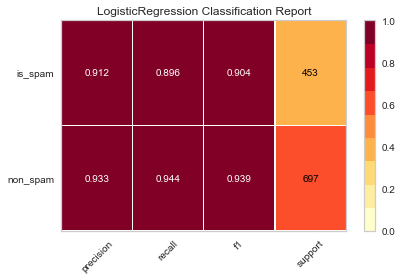

In [49]:
LogRegmodel.score(X_test_scale, y_test)  # Evaluate the model on the test data
g = LogRegmodel.poof()    

### XGboost

In [51]:
from xgboost import XGBClassifier
XGboost= XGBClassifier()
print(classification_report (y_test,preds))

XGbmodel = ClassificationReport(XGboost, classes=["non_spam","is_spam"], support=True)

XGbmodel.fit(X_train_scale, y_train)  # Fit the visualizer and the model

XGbpeds=XGbmodel.predict(X_test_scale)

XGbcm = metrics.confusion_matrix(y_test,XGbpeds)
print(XGbcm)  

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       697
           1       0.40      0.37      0.38       453

   micro avg       0.53      0.53      0.53      1150
   macro avg       0.50      0.50      0.50      1150
weighted avg       0.52      0.53      0.53      1150



C:\Users\czhu5\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\czhu5\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[676  21]
 [ 43 410]]


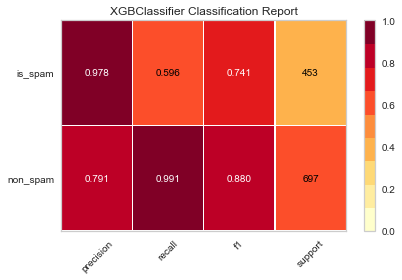

In [40]:
XGbmodel.score(X_test_scale, y_test)  # Evaluate the model on the test data
g = XGbmodel.poof()  

## Reference

https://video.search.yahoo.com/search/video?fr=mcafee&p=how+to+implement+logistic+regression+in+python#id=6&vid=0f274214b516e1e979961c642d143363&action=view

https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb

https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html